In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Loading Dataset

In [8]:
data = pd.read_csv(r"C:\Users\banur\Downloads\creditcard.csv\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Checking Balance

Class
0    284315
1       492
Name: count, dtype: int64


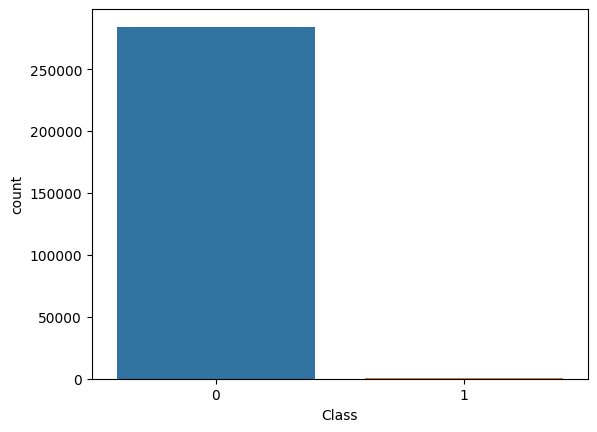

In [3]:
print(data['Class'].value_counts())
sns.countplot(x='Class', data=data)
plt.show()


As we see the data is highly imbalanced

Separating X and Y's

In [11]:
X = data.drop('Class', axis=1)
y = data['Class']

Scale Features

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting the data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Train Logistic Regression

In [29]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

[0 0 0 ... 0 0 0]


Train SVM

In [31]:
X_small = X_train[:30000]
y_small = y_train[:30000]

svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_small, y_small)
y_pred_svm = svm.predict(X_test)

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



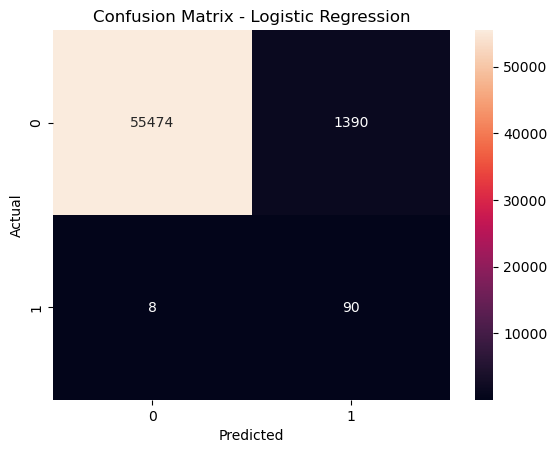

=== Support Vector Machine ===
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.90      0.05        98

    accuracy                           0.95     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.95      0.97     56962



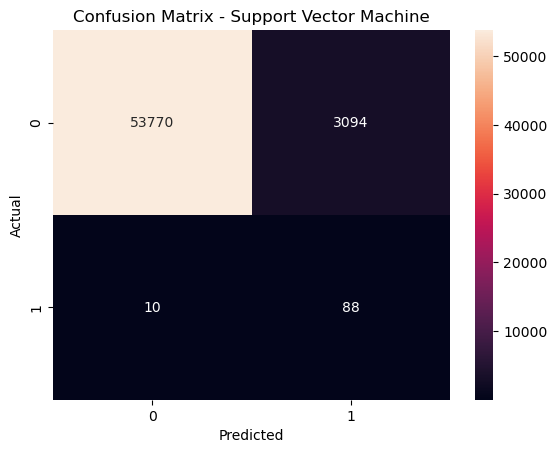

In [33]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")


In [37]:
print(f"Confusion matrix for Logistic Regression : \n",confusion_matrix(y_test,y_pred_lr))

Confusion matrix for Logistic Regression : 
 [[55474  1390]
 [    8    90]]


In [39]:
print(f"Classification report for Logistic Regression : \n",classification_report(y_test,y_pred_lr))

Classification report for Logistic Regression : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

